Using Device: cuda


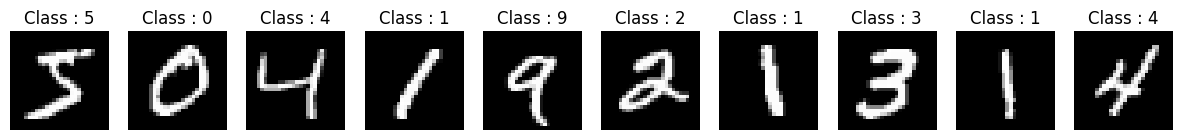

Epoch [1/5], Step [100/938], Loss: 0.5140
Epoch [1/5], Step [200/938], Loss: 0.1693
Epoch [1/5], Step [300/938], Loss: 0.1167
Epoch [1/5], Step [400/938], Loss: 0.0964
Epoch [1/5], Step [500/938], Loss: 0.0834
Epoch [1/5], Step [600/938], Loss: 0.0819
Epoch [1/5], Step [700/938], Loss: 0.0662
Epoch [1/5], Step [800/938], Loss: 0.0587
Epoch [1/5], Step [900/938], Loss: 0.0613
Epoch [2/5], Step [100/938], Loss: 0.0530
Epoch [2/5], Step [200/938], Loss: 0.0420
Epoch [2/5], Step [300/938], Loss: 0.0462
Epoch [2/5], Step [400/938], Loss: 0.0400
Epoch [2/5], Step [500/938], Loss: 0.0402
Epoch [2/5], Step [600/938], Loss: 0.0408
Epoch [2/5], Step [700/938], Loss: 0.0428
Epoch [2/5], Step [800/938], Loss: 0.0469
Epoch [2/5], Step [900/938], Loss: 0.0422
Epoch [3/5], Step [100/938], Loss: 0.0292
Epoch [3/5], Step [200/938], Loss: 0.0283
Epoch [3/5], Step [300/938], Loss: 0.0334
Epoch [3/5], Step [400/938], Loss: 0.0308
Epoch [3/5], Step [500/938], Loss: 0.0310
Epoch [3/5], Step [600/938], Loss:

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt

device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using Device: {device}")


transform = transforms.Compose([
	transforms.ToTensor(),
	transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform = transform)
test_dataset = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = transform)


train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 1000, shuffle = False)

fig, axes = plt.subplots(1, 10, figsize = (15, 2))

for i in range(10):
  image, label = train_dataset[i]
  axes[i].imshow(image.squeeze(), cmap = 'gray')
  axes[i].set_title(f'Class : {label}')
  axes[i].axis('off')

plt.show()


class CNN_example(nn.Module):
  def __init__(self):
    super(CNN_example, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, stride = 1, padding = 1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1)
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.relu = nn.ReLU();
    self.fc1 = nn.Linear(64 * 7 * 7, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward (self, x):
    x = self.relu(self.conv1(x))
    x = self.pool(x)
    x = self.relu(self.conv2(x))
    x = self.pool(x)
    x = x.view (-1, 64 * 7 * 7)
    #x = self.fc1(x)
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    #x = self.relu(self.fc1(x))
    return x


start_time = time.time()
model=CNN_example().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
num_epochs=5
for epoch in range(num_epochs):
    model.train()
    running_loss=0
    for i,(images,labels) in enumerate(train_loader):
        images,labels=images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        running_loss+=loss.item()

        if(i+1)%100==0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0
end_time = time.time()
execution_time = end_time - start_time
print(f"Time taken: {execution_time:.4f} seconds")

In [6]:
# Evaluate on test set
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 99.13%
